In [8]:
import pymysql

cnx = pymysql.connect(user='pgbia20p2g06', password='@mysqlHKG6QY',
                              host='10.126.209.159',
                              database='nos')

import pandas as pd
tv = pd.read_sql("SELECT * FROM client_tv_data_eurekathon", cnx);

In [9]:
tv.head()

,sa,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7,subcategory_8,subcategory_9,...,nr_seconds_seen_9h11h_bin,nr_seconds_seen_12h14h_bin,nr_seconds_seen_15h17h_bin,nr_seconds_seen_18h20h_bin,nr_seconds_seen_21h23h_bin,segment,package_type,gender,fiscal_num_bin,month_id
0,FEE7FE50D98387956AA959602721781F,126,93.0,66.0,120.0,116.0,31.0,106.0,137.0,90.0,...,5,4,5,4,5,A,5P,1.0,1,202003
1,C93A87C67D139A7460BD80CCF18C1422,126,134.0,31.0,22.0,84.0,116.0,93.0,120.0,29.0,...,1,6,9,5,2,A,4P,0.0,3,202003
2,E68FC63E14BA6D8F58C8D37F414CE381,126,130.0,134.0,142.0,63.0,20.0,96.0,47.0,105.0,...,5,4,6,5,5,A,5P,1.0,4,202003
3,AA2B8E1C01A0173693FDED54D5129149,126,63.0,22.0,47.0,31.0,135.0,86.0,96.0,106.0,...,5,6,6,6,7,A,4P,0.0,1,202003
4,3F1752BF254A9509922193E006FC806A,126,78.0,86.0,63.0,128.0,120.0,61.0,31.0,116.0,...,8,9,10,10,6,A,3P,0.0,1,202003


In [10]:
tv.columns

Index(['sa', 'subcategory_1', 'subcategory_2', 'subcategory_3',
       'subcategory_4', 'subcategory_5', 'subcategory_6', 'subcategory_7',
       'subcategory_8', 'subcategory_9', 'subcategory_10',
       'subcategory_qtd_seconds_mon_1_bin',
       'subcategory_qtd_seconds_mon_2_bin',
       'subcategory_qtd_seconds_mon_3_bin',
       'subcategory_qtd_seconds_mon_4_bin',
       'subcategory_qtd_seconds_mon_5_bin',
       'subcategory_qtd_seconds_mon_6_bin',
       'subcategory_qtd_seconds_mon_7_bin',
       'subcategory_qtd_seconds_mon_8_bin',
       'subcategory_qtd_seconds_mon_9_bin',
       'subcategory_qtd_seconds_mon_10_bin', 'qtd_seconds_mon_bin',
       'nr_devices', 'channel_diversity_sa_bin', 'nr_seconds_seen_0h2h_bin',
       'nr_seconds_seen_3h5h_bin', 'nr_seconds_seen_6h8h_bin',
       'nr_seconds_seen_9h11h_bin', 'nr_seconds_seen_12h14h_bin',
       'nr_seconds_seen_15h17h_bin', 'nr_seconds_seen_18h20h_bin',
       'nr_seconds_seen_21h23h_bin', 'segment', 'package_type', '

In [11]:
teste=tv.groupby(['sa','month_id']).count().reset_index()

In [12]:
teste.loc[teste.subcategory_1>1]

,sa,month_id,subcategory_1,subcategory_2,subcategory_3,subcategory_4,subcategory_5,subcategory_6,subcategory_7,subcategory_8,...,nr_seconds_seen_6h8h_bin,nr_seconds_seen_9h11h_bin,nr_seconds_seen_12h14h_bin,nr_seconds_seen_15h17h_bin,nr_seconds_seen_18h20h_bin,nr_seconds_seen_21h23h_bin,segment,package_type,gender,fiscal_num_bin


In [13]:
tv=tv.sort_values(['sa','month_id'])
tv2=tv.groupby('sa').tail(1).reset_index()

In [14]:
tv.segment.value_counts(dropna=False)

A    658430
B    220650
D     17604
C         5
Name: segment, dtype: int64

In [15]:
user_feat=tv[['sa','fiscal_num_bin','segment','gender']]
user_feat=user_feat.groupby('sa').tail(1).reset_index(drop=True)

In [16]:
user_feat.segment=user_feat.segment.replace({'D':'Other','C':'Other'})

In [17]:
user_feat.drop('sa',axis=1,inplace=True)

In [18]:
user_feat.gender.value_counts(dropna=False)

0.0    237275
1.0    175238
NaN     42888
Name: gender, dtype: int64

In [19]:
#use missing level as a new category
user_feat.gender=user_feat.gender.fillna(-1)

In [20]:
user_feat.dtypes

fiscal_num_bin      int64
segment            object
gender            float64
dtype: object

In [21]:
user_feat.gender=user_feat.gender.astype(str)

In [22]:
#once the variable is binned the max and min are always the same (doesn't depend on the train/test set)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [23]:
user_feat=pd.get_dummies(user_feat)

In [24]:
user_scaled = scaler.fit_transform(user_feat)

In [25]:
userf = pd.DataFrame(user_scaled)

In [26]:
userf.shape

(455401, 7)

In [27]:
tv2=tv2[['sa','subcategory_1', 'subcategory_2', 'subcategory_3',
       'subcategory_4', 'subcategory_5', 'subcategory_6', 'subcategory_7',
       'subcategory_8', 'subcategory_9', 'subcategory_10']]

In [28]:
tv2.subcategory_1.isnull().sum()

0

In [29]:
tv2.subcategory_2.isnull().sum()

3847

In [30]:
tv2.subcategory_3.isnull().sum()

7105

In [31]:
ui=pd.concat([tv2[['sa','subcategory_1']],
              tv2[['sa','subcategory_2']],
              tv2[['sa','subcategory_3']],
              tv2[['sa','subcategory_4']],
              tv2[['sa','subcategory_5']],
              tv2[['sa','subcategory_6']],
              tv2[['sa','subcategory_7']],
              tv2[['sa','subcategory_8']],
              tv2[['sa','subcategory_9']],
              tv2[['sa','subcategory_10']]],
             axis=0)

In [32]:
for col in ui.columns:
    ui[col]=ui[col].fillna(0)

In [33]:
ui.shape

(4554010, 11)

In [34]:
ui['item']=ui.subcategory_1+ui.subcategory_2+ui.subcategory_3+ui.subcategory_4+ui.subcategory_5+ui.subcategory_6+ui.subcategory_7+ui.subcategory_8+ui.subcategory_9+ui.subcategory_10

In [35]:
ui.shape

(4554010, 12)

In [36]:
subcat=[col for col in tv2.columns if 'subcat' in col]

In [37]:
ui.drop(subcat,axis=1,inplace=True)

In [38]:
ui=ui.loc[ui.item!=0]

In [39]:
ui['count']=1

In [40]:
ui.shape

(4401527, 3)

In [41]:
ui.drop_duplicates()

,sa,item,count
0,00000DEA2619C5B46B7617CD2522AAC4,126.0,1
1,00002D061531546A51AEC5058224C554,126.0,1
2,000084B13D863DF2D1285A9ADC85791C,78.0,1
3,00009BFE0ABF1CEAD0404A445DEBD0A4,126.0,1
4,0000B2FEE745115B47039BAB152CF2FB,90.0,1
...,...,...,...
455394,FFFF108937DEBBA20BEF027986F5CD87,98.0,1
455395,FFFF36FF412D3DFA73A846205B8B559A,81.0,1
455397,FFFF8C8057E2DB116B8F8AA586DBE2D4,99.0,1
455398,FFFF8DC0E16276E975437E97558AE55B,93.0,1


### train/test 1 

### train/test 2

### train/test 3

In [42]:
m=pd.pivot_table(ui,'count','sa','item','count',fill_value=0)

In [43]:
items=list(m.columns)

In [44]:
from scipy.sparse import coo_matrix
matrix=coo_matrix(m)

In [45]:
cli=matrix.toarray()[0]

In [46]:
[ j for (i,j) in zip(cli,items) if i >= 1 ]

[34.0, 63.0, 66.0, 126.0]

In [47]:
ui.loc[ui.sa=='00000DEA2619C5B46B7617CD2522AAC4']

,sa,item,count
0,00000DEA2619C5B46B7617CD2522AAC4,126.0,1
0,00000DEA2619C5B46B7617CD2522AAC4,34.0,1
0,00000DEA2619C5B46B7617CD2522AAC4,66.0,1
0,00000DEA2619C5B46B7617CD2522AAC4,63.0,1


In [48]:
from lightfm.cross_validation import random_train_test_split
train, test= random_train_test_split(matrix, test_percentage=0.2)

In [49]:
train

<455401x141 sparse matrix of type '<class 'numpy.int64'>'
	with 3521221 stored elements in COOrdinate format>

In [50]:
test

<455401x141 sparse matrix of type '<class 'numpy.int64'>'
	with 880306 stored elements in COOrdinate format>

In [51]:
cli1_1=train.toarray()[0]

In [52]:
cli1_2=test.toarray()[0]

In [53]:
[ j for (i,j) in zip(cli1_1,items) if i >= 1 ]

[34.0, 63.0, 66.0, 126.0]

In [54]:
[ j for (i,j) in zip(cli1_2,items) if i >= 1 ]

[]

# Baseline tentativa 1

# Baseline tentativa 2

# Baseline tentativa 3

In [52]:
train_pop=pd.DataFrame.sparse.from_spmatrix(train)

In [53]:
# Popular model - top 5
rec_pop=train_pop.sum(axis=0).sort_values().tail(5).index.to_list()

In [54]:
test_pop=pd.DataFrame.sparse.from_spmatrix(test)

In [55]:
rec_pop

[77, 82, 74, 86, 121]

In [56]:
test_pop['nr_items']=test_pop.sum(axis=1)

In [57]:
test_pop=test_pop.loc[test_pop.nr_items>0]

In [59]:
top5=[121,86,74,82,77]

In [60]:
def calc_hits(cols):
    nr_items=int(cols[-1])
    cat=cols[:-1]
    top_filters=top5[:nr_items]
    hits=[1 if cat[topi]>0 else 0 for topi in top_filters]
    return sum(hits)

In [61]:
calc_hits(list(test_pop.iloc[4,:142]))

2

In [62]:
test_pop['hits']=test_pop.iloc[:,:142].apply(lambda x: calc_hits(list(x)),axis=1)

In [63]:
test_pop['hits'].value_counts(dropna=False)

0    257279
1    112151
2     24189
3      3889
4       436
5        10
Name: hits, dtype: int64

In [64]:
#baseline recall at 5
(test_pop['hits']/test_pop['nr_items']).mean()

0.1653670349233153

### loss: warp

In [55]:
train2, val= random_train_test_split(train, test_percentage=0.2)

In [56]:
train2.shape

(455401, 141)

In [57]:
userf.shape

(455401, 7)

In [69]:
from lightfm import LightFM
from lightfm.evaluation import auc_score, recall_at_k
import numpy as np
import time
import scipy
start_time = time.time()

model= LightFM(learning_rate = 0.005, loss='warp')
#auc=[]
rec=[]

for e in range(25):
    model.fit_partial(train2, epochs=1, num_threads=4)
    #auc_train= auc_score(model, train, num_threads=4).mean()
    rec_train= recall_at_k(model, train2, num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model, test, num_threads=4).mean()
    rec_val= recall_at_k(model, val, num_threads=4, k=5).mean()
    
    #auc.append((auc_train, auc_test))
    rec.append((rec_train, rec_val))
    
#auc = np.array(auc)
rec = np.array(rec)
print("--- %s seconds ---" % (time.time() - start_time))

--- 110.26127171516418 seconds ---


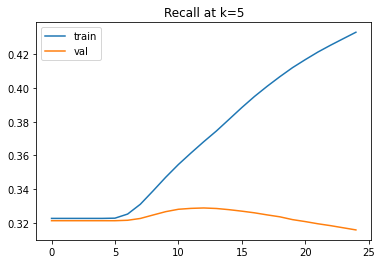

In [70]:
from matplotlib import pyplot as plt
#Recall
plt.plot(rec[:,0], label='train')
plt.plot(rec[:,1], label='val')
plt.title('Recall at k=5')
plt.legend()
plt.show()

In [71]:
start_time = time.time()

model= LightFM(learning_rate = 0.005, loss='warp')
#auc=[]
rec=[]

for e in range(10):
    model.fit_partial(train, epochs=1, num_threads=4)
    #auc_train= auc_score(model, train, num_threads=4).mean()
    rec_train= recall_at_k(model, train, num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model, test, num_threads=4).mean()
    rec_test= recall_at_k(model, test, num_threads=4, k=5).mean()
    
    #auc.append((auc_train, auc_test))
    rec.append((rec_train, rec_test))
    
#auc = np.array(auc)
rec = np.array(rec)
print("--- %s seconds ---" % (time.time() - start_time))

--- 50.8643102645874 seconds ---


In [72]:
max(rec[:,1])

0.3354066795707663

In [73]:
model.predict_rank(test,num_threads=4).getrow(1420).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [74]:
model.predict_rank(test,num_threads=4).getrow(255).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 7., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [75]:
cli1_scores=list(model.predict(0,list(range(0,141)),num_threads=4))

In [76]:
dict1 = dict(zip(items, cli1_scores))

In [77]:
dict1=dict(sorted(dict1.items(), key=lambda item: item[1]))

In [78]:
#top 5 canais recomendados para o cli 0
list(dict1.keys())[-5:]

[63.0, 81.0, 78.0, 86.0, 126.0]

In [70]:
from lightfm import LightFM
from lightfm.evaluation import auc_score, recall_at_k
import numpy as np
import time
import scipy
start_time = time.time()

model2= LightFM(no_components=2, learning_rate = 0.005, loss='warp', random_state=0)
#auc=[]
rec2=[]

for e in range(25):
    model2.fit_partial(train2, user_features=scipy.sparse.csr_matrix(userf.values), epochs=1, num_threads=4)
    #auc_train= auc_score(model, train, num_threads=4).mean()
    rec_train= recall_at_k(model2, train2, user_features=scipy.sparse.csr_matrix(userf.values), num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model, test, num_threads=4).mean()
    rec_val= recall_at_k(model2, val, user_features=scipy.sparse.csr_matrix(userf.values), num_threads=4, k=5).mean()
    
    #auc.append((auc_train, auc_test))
    rec2.append((rec_train, rec_val))
    
#auc = np.array(auc)
rec2 = np.array(rec2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 88.88611888885498 seconds ---


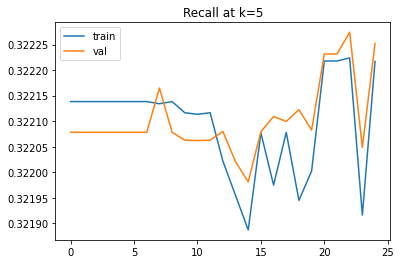

In [71]:
from matplotlib import pyplot as plt
#Recall
plt.plot(rec2[:,0], label='train')
plt.plot(rec2[:,1], label='val')
plt.title('Recall at k=5')
plt.legend()
plt.show()

In [102]:
start_time = time.time()

model2= LightFM(learning_rate = 0.005, loss='warp')
#auc=[]
rec2=[]

for e in range(22):
    model2.fit_partial(train, user_features=scipy.sparse.csr_matrix(userf.values), epochs=1, num_threads=4)
    #auc_train= auc_score(model, train, num_threads=4).mean()
    rec_train= recall_at_k(model2, train, user_features=scipy.sparse.csr_matrix(userf.values), num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model, test, num_threads=4).mean()
    rec_val= recall_at_k(model2, test, user_features=scipy.sparse.csr_matrix(userf.values), num_threads=4, k=5).mean()
    
    #auc.append((auc_train, auc_test))
    rec2.append((rec_train, rec_val))
    
#auc = np.array(auc)
rec2 = np.array(rec2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 148.16912388801575 seconds ---


In [103]:
max(rec2[:,1])

0.32136100658838207

### loss: bpr

In [94]:
start_time = time.time()
model2=LightFM(learning_rate = 0.005, loss='bpr')
#auc2=[]
rec2=[]

for e in range(25):
    model2.fit_partial(train2, epochs=1, num_threads=4)
    #auc_train= auc_score(model2, train, num_threads=4).mean()
    prec_train= recall_at_k(model2, train2, num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model2, test, num_threads=4).mean()
    prec_test= recall_at_k(model2, val, num_threads=4, k=5).mean()
    
    #auc2.append((auc_train, auc_test))
    rec2.append((rec_train, rec_test))
    
#auc2 = np.array(auc2)
rec2 = np.array(rec2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 109.97933506965637 seconds ---


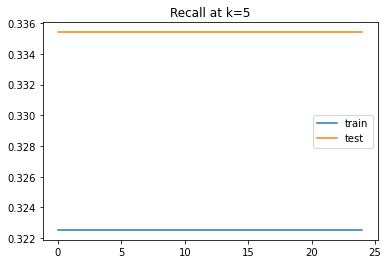

In [95]:
plt.plot(rec2[:,0], label='train')
plt.plot(rec2[:,1], label='test')
plt.title('Recall at k=5')
plt.legend()
plt.show()

In [96]:
start_time = time.time()

model2= LightFM(learning_rate = 0.005, loss='bpr')
#auc=[]
rec2=[]

for e in range(22):
    model2.fit_partial(train, epochs=1, num_threads=4)
    #auc_train= auc_score(model, train, num_threads=4).mean()
    rec_train= recall_at_k(model2, train, num_threads=4, k=5).mean()
    
    #auc_test= auc_score(model, test, num_threads=4).mean()
    rec_val= recall_at_k(model2, test, num_threads=4, k=5).mean()
    
    #auc.append((auc_train, auc_test))
    rec2.append((rec_train, rec_val))
    
#auc = np.array(auc)
rec2 = np.array(rec2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 113.52731037139893 seconds ---


In [101]:
max(rec2[:,1])

0.32280080668173267

In [97]:
cli1_scores2=list(model2.predict(0,list(range(0,141)),num_threads=4))

In [98]:
dict2 = dict(zip(items, cli1_scores2))

In [99]:
dict2=dict(sorted(dict2.items(), key=lambda item: item[1]))

In [100]:
#top 5 canais recomendados para o cli 0
list(dict2.keys())[-5:]

[81.0, 78.0, 63.0, 86.0, 126.0]

In [ ]:
#sklearn recommender

In [1]:
pip list

DEPRECATION: The default format will switch to columns in the future. You can use --format=(legacy|columns) (or define a format=(legacy|columns) in your pip.conf under the [list] section) to disable this warning.
alembic (1.4.3)
apt-xapian-index (0.47)
argon2-cffi (20.1.0)
asn1crypto (0.24.0)
async-generator (1.10)
attrs (20.3.0)
Automat (0.6.0)
backcall (0.2.0)
beautifulsoup4 (4.6.0)
bleach (3.2.1)
blinker (1.4)
catboost (0.24.3)
certifi (2018.1.18)
certipy (0.1.3)
cffi (1.14.3)
chardet (3.0.4)
click (6.7)
cloud-init (20.4)
colorama (0.3.7)
command-not-found (0.3)
configobj (5.0.6)
confuse (1.4.0)
constantly (15.1.0)
cryptography (2.1.4)
cupshelpers (1.0)
cycler (0.10.0)
Cython (0.29.21)
dataclasses (0.8)
decorator (4.4.2)
defusedxml (0.6.0)
distro-info (0.18ubuntu0.18.04.1)
dynetx (0.2.3)
entrypoints (0.3)
et-xmlfile (1.0.1)
future (0.18.2)
graphviz (0.15)
h5py (2.7.1)
html5lib (0.999999999)
htmlmin (0.1.12)
httplib2 (0.9.2)
hyperlink (17.3.1)
idna (2.6)
ImageHash (4.2.0)
imbalanced-